# Handling Missing Values

**Titanic Dataset for Non Time Series problem**

In [87]:
import pandas as pd

train = pd.read_csv('/content/drive/MyDrive/train_titanic.csv')
test = pd.read_csv('/content/drive/MyDrive/test_titanic.csv')

In [88]:
print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (891, 12)
Testing data shape:  (418, 11)


In [89]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Examining the Target column**

For each passenger in the test set, we need to create a model that predicts wheater or not the passenger survived the sinking of the Titanic. Hence Survived is that target column in the dataset. Let's examine the Distribution of the target column.

In [90]:
ds = train['Survived'].value_counts()
ds

0    549
1    342
Name: Survived, dtype: int64

*Visualization of 'Survived' column*
*   1: Survived
*   0: Did not Survive



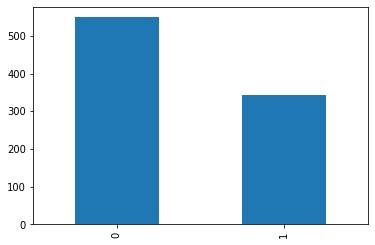

In [91]:
ds.plot.bar()

**Detecting Missing values**

The first step is to detect the count/percentage of missing values in every column of the dataset. This will give an idea about the distribution of missing values.



The missing values in the Dataset for training:

In [92]:
missing_values_train = train.isnull().sum()
percentage_train = 100 * train.isnull().sum() / len(train)
missing_values_table_train = pd.concat([missing_values_train, percentage_train], axis = 1)
missing_values_table_train.columns = ['Num. of missing values', '% of missing values']
missing_values_table_train

,Num. of missing values,% of missing values
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


The missing values in the Dataset for testing:

In [93]:
missing_values_test = test.isnull().sum()
percentage_test = 100 * test.isnull().sum() / len(test)
missing_values_table_test = pd.concat([missing_values_test, percentage_test], axis = 1)
missing_values_table_test.columns = ['Num. of missing values', '% of missing values']
missing_values_table_test

,Num. of missing values,% of missing values
PassengerId,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,86,20.574163
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,1,0.239234
Cabin,327,78.229665


**Detecting missing data visually using Missingno library**

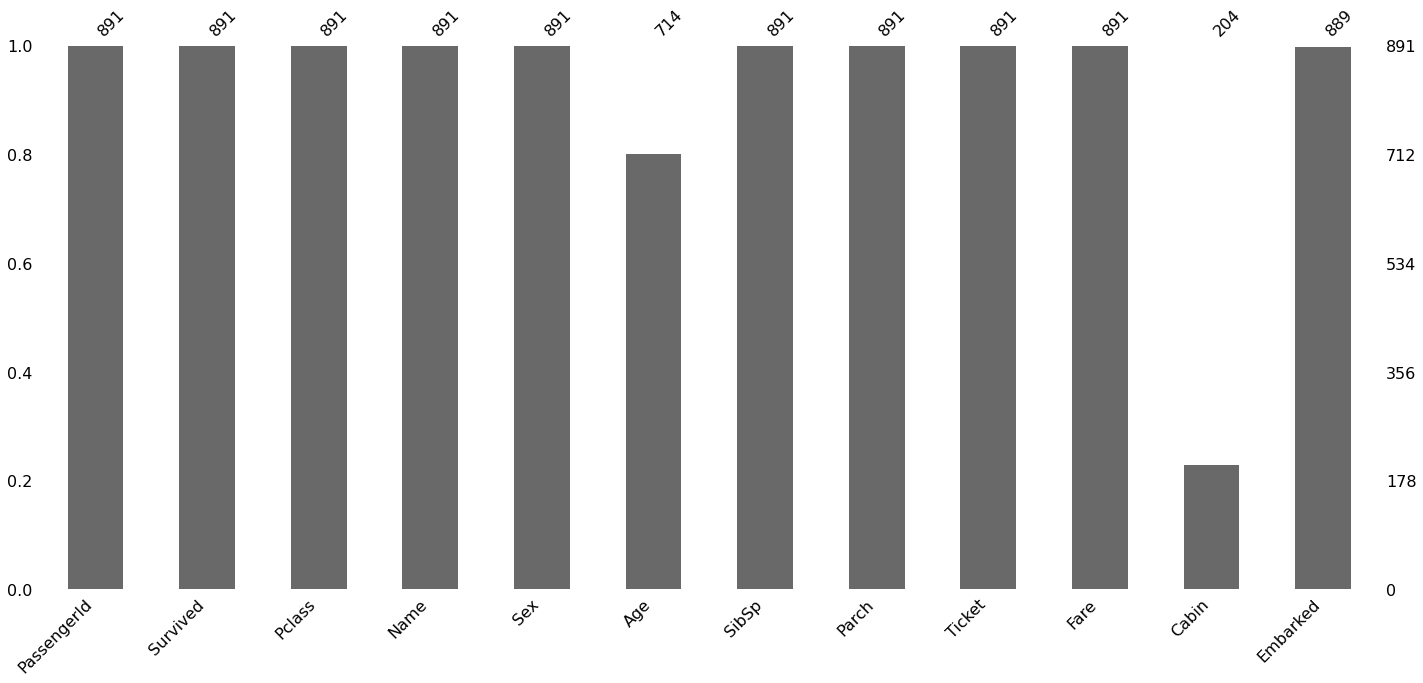

In [94]:
import missingno as msno
msno.bar(train)

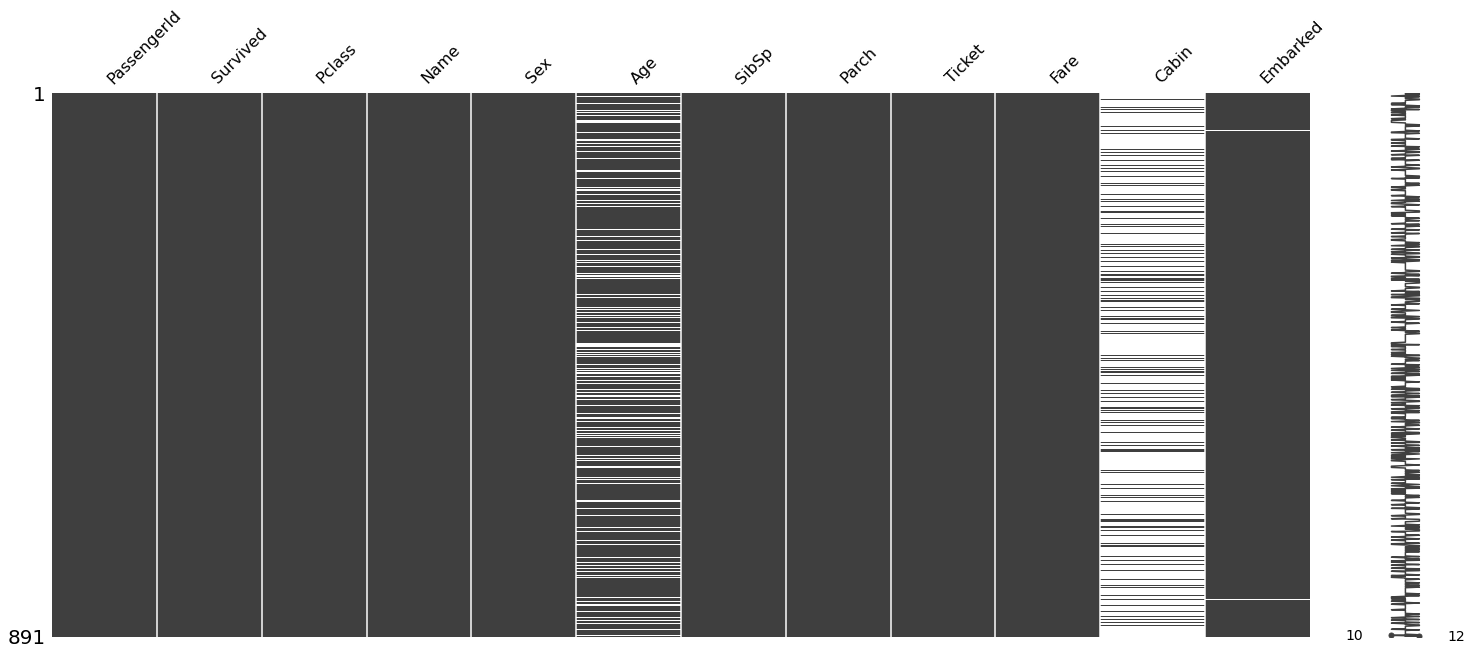

In [95]:
msno.matrix(train)

**Reasons for Missing Values**

The missingno package also let's us sort the graph by a particular column. Let's sort the values by Age and Cabin column to see if there is a pattern in the missing values.

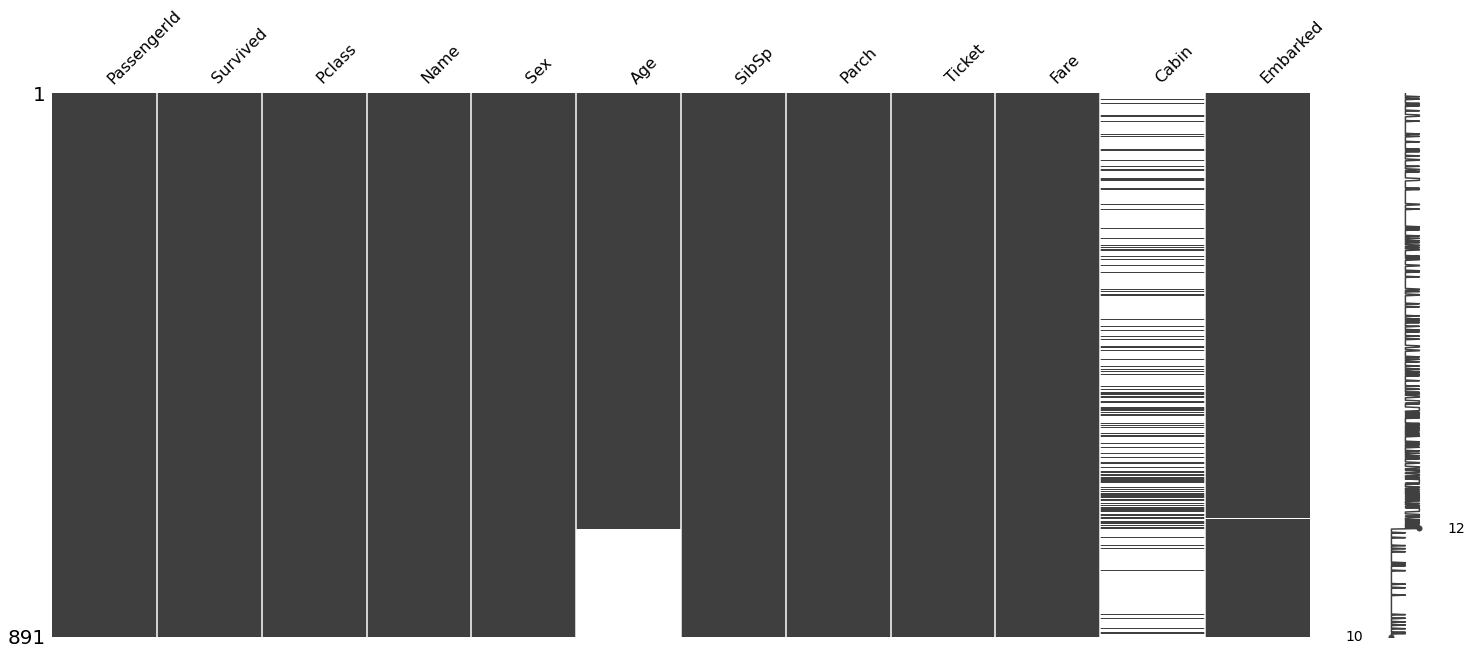

In [96]:
# Sorted by Age
msno.matrix(train.sort_values('Age'))

It is clear that there isn't a relation between the missingness in Age and Cabin column. To cement this conclusion further we can also draw a Heatmap among the different variables in the dataset.

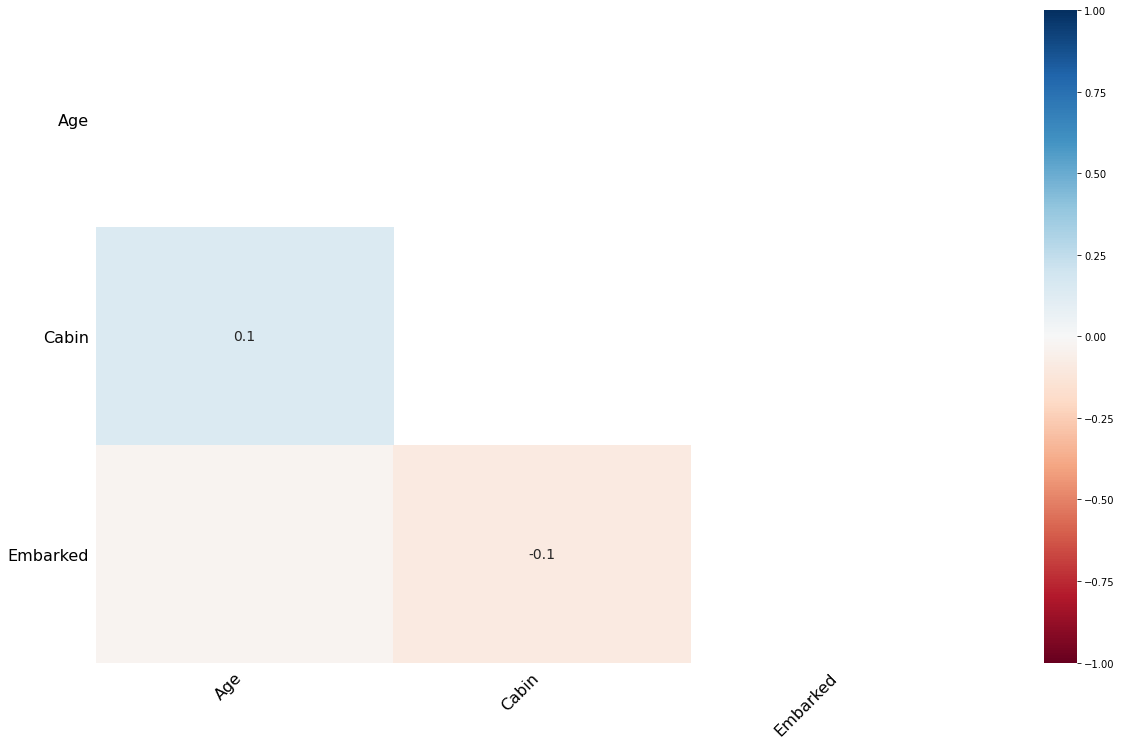

In [97]:
msno.heatmap(train)

The heatmap function shows that there are no strong correlations between missing values of different features. This is good; low correlations further inidicate that the data are MAR (Missing at Random).

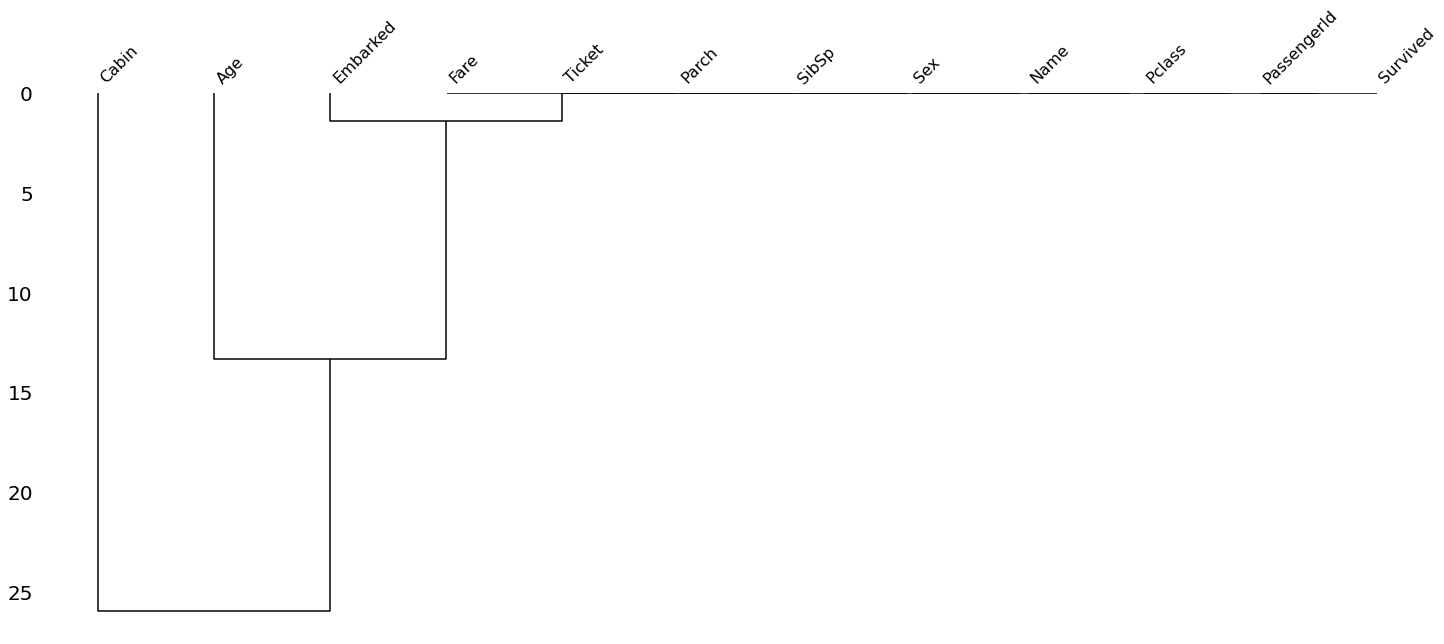

In [98]:
msno.dendrogram(train)

**Treating Missing values**

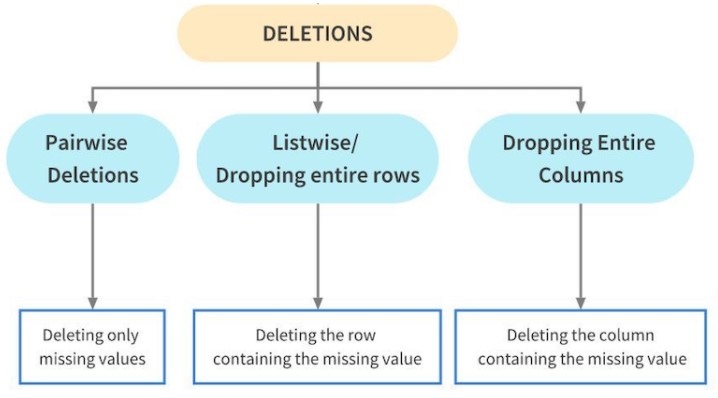

**Pairwise Deletion** is used when values are missing completly at random i.e MCAR. During Pairwise Deletion, only the missing values are deleted. All operations in pandas like mean, sum etc intrinsically skip missing values.

In [99]:
train_1 = train.copy()
train_1['Age'].mean()   # pandas skips the missing values and calculates mean of the remaining values

29.69911764705882

**Listwise Deletion**, complete rows (which contain the missing values) are deleted. As a result, it is also called Complete Case deletion. Like Pairwise deletion, listwise deletions are also only used for MCAR values.

In [100]:
train_1.dropna(subset = ['Age'], how = 'any', inplace = True)
train_1['Age'].isnull().sum()

0

The Listwise deletion problem is that a major chunk of data and hence a lot of information is lost. Hence, it is advisable to use it only when the number of missing values is very small.

**Droppint complete columns** If a column contains a lot of missing values, say more than 80%, and the feature is not significant, you might want to delete that feature. However, again, it is not a good methodology to delete data.

# Imputations (General) Techniques for non Time Series Problems

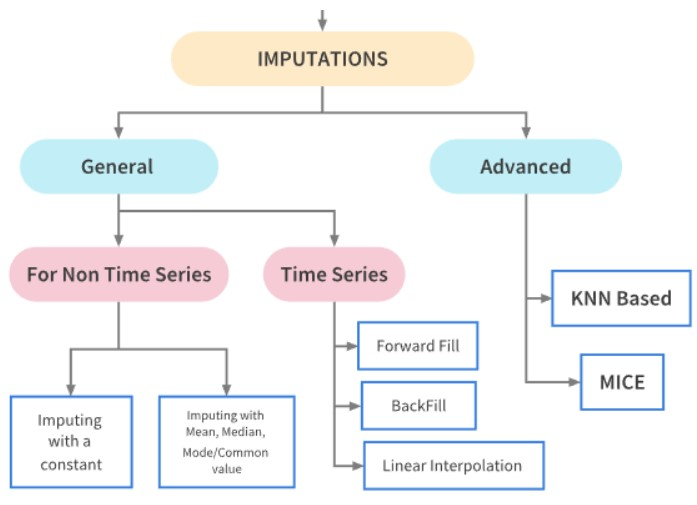

Basic Imputation Techniques:
*   Imputating with a constant value

*   Imputation using the statistics (mean, median or most frequent) of each column in which the missing values are located

For this we shall use The SimpleImputer class from sklearn.



In [101]:
from sklearn.impute import SimpleImputer
train_const = train.copy()
main_imputer = SimpleImputer(strategy = 'constant', fill_value = 0)
train_const.iloc[:,:] = main_imputer.fit_transform(train_const)
train_const.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [102]:
train_const = train.copy()
main_imputer = SimpleImputer(strategy = 'most_frequent')
train_const.iloc[:,:] = main_imputer.fit_transform(train_const)
train_const.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Advanced Imputation Techniques

**K-Nearest Neighbor**

In [103]:
train_knn = train.copy(deep = True)

In [104]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_knn['Age'] = scaler.fit_transform(train_knn['Age'].to_numpy().reshape(-1, 1))

knn_imputer = KNNImputer(n_neighbors = 2, weights = "uniform")
train_knn['Age'] = knn_imputer.fit_transform(train_knn[['Age']])

In [105]:
train_knn['Age'].isnull().sum()

0

In [106]:
train_knn['Age'].head()

0    0.271174
1    0.472229
2    0.321438
3    0.434531
4    0.434531
Name: Age, dtype: float64

# Multivariate feature imputation - Multivariate imputation by chained equations (MICE)

A strategy for imputing missing values by modeling each feature with missing values as a function of other features in a round-robin fashion. It performs multiple regressions over random sample of the data, then takes the average of the multiple regression values and uses that value to impute the missing value. In sklearn, it is implemented as follows:

In [107]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
train_mice = train.copy(deep = True)

mice_imputer = IterativeImputer()
train_mice['Age'] = mice_imputer.fit_transform(train_mice[['Age']])

In [108]:
train_mice['Age'].isnull().sum()

0

# Air Quality Data in India (2015 - 2020) for Time Series problem

In [109]:
city_day = pd.read_csv('/content/drive/MyDrive/city_day.csv', parse_dates = True, index_col = 'Date')
city_day1 = city_day.copy(deep = True)
city_day.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
Date,,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
2015-01-02,Ahmedabad,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2015-01-03,Ahmedabad,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
2015-01-04,Ahmedabad,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
2015-01-05,Ahmedabad,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


As is evident, city_day dataframe consists of daily pollution level data of some of the prominent cities in India.

In [110]:
missing_values_city_day = city_day.isnull().sum()
percentage_city_day = 100 * city_day.isnull().sum() / len(city_day)
missing_values_table_city_day = pd.concat([missing_values_city_day, percentage_city_day], axis = 1)
missing_values_table_city_day.columns = ['Num. of missing values', '% of missing values']
missing_values_table_city_day

,Num. of missing values,% of missing values
City,0,0.000000
PM2.5,4598,15.570079
PM10,11140,37.723071
NO,3582,12.129626
NO2,3585,12.139785
NOx,4185,14.171549
NH3,10328,34.973418
CO,2059,6.972334
SO2,3854,13.050692
O3,4022,13.619586


There are a lot of missing values and some of the columns like **Xylene** and **PM10** have more than 50% of the values missing. Let's now see how we can impute these missing values.

In [111]:
city_day['Xylene'][50:64]

Date
2015-02-20     7.48
2015-02-21    15.44
2015-02-22     8.47
2015-02-23    28.46
2015-02-24     6.05
2015-02-25     0.81
2015-02-26      NaN
2015-02-27      NaN
2015-02-28      NaN
2015-03-01     1.32
2015-03-02     0.22
2015-03-03     2.25
2015-03-04     1.55
2015-03-05     4.13
Name: Xylene, dtype: float64

**Imputing using ffill**

**ffill** propagate last valid observation forward to next valid

In [112]:
city_day.fillna(method = 'ffill', inplace = True)
city_day['Xylene'][50:64]

Date
2015-02-20     7.48
2015-02-21    15.44
2015-02-22     8.47
2015-02-23    28.46
2015-02-24     6.05
2015-02-25     0.81
2015-02-26     0.81
2015-02-27     0.81
2015-02-28     0.81
2015-03-01     1.32
2015-03-02     0.22
2015-03-03     2.25
2015-03-04     1.55
2015-03-05     4.13
Name: Xylene, dtype: float64

**Imputation using bfill**

**bfill**: use next valid observation to fill gap

In [113]:
city_day['AQI'][20:30]

Date
2015-01-21      NaN
2015-01-22      NaN
2015-01-23      NaN
2015-01-24      NaN
2015-01-25      NaN
2015-01-26      NaN
2015-01-27      NaN
2015-01-28      NaN
2015-01-29    209.0
2015-01-30    328.0
Name: AQI, dtype: float64

In [114]:
city_day.fillna(method = 'bfill', inplace = True)
city_day['AQI'][20:30]

Date
2015-01-21    209.0
2015-01-22    209.0
2015-01-23    209.0
2015-01-24    209.0
2015-01-25    209.0
2015-01-26    209.0
2015-01-27    209.0
2015-01-28    209.0
2015-01-29    209.0
2015-01-30    328.0
Name: AQI, dtype: float64

**Imputation using Linear Interpolation method**

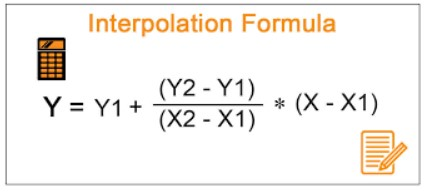

In [115]:
city_day1['Xylene'][50:65]

Date
2015-02-20     7.48
2015-02-21    15.44
2015-02-22     8.47
2015-02-23    28.46
2015-02-24     6.05
2015-02-25     0.81
2015-02-26      NaN
2015-02-27      NaN
2015-02-28      NaN
2015-03-01     1.32
2015-03-02     0.22
2015-03-03     2.25
2015-03-04     1.55
2015-03-05     4.13
2015-03-06      NaN
Name: Xylene, dtype: float64

In [116]:
# Interpolate using the linear method
city_day1.interpolate(limit_direction = "both", inplace = True)
city_day1['Xylene'][50:65]

Date
2015-02-20     7.4800
2015-02-21    15.4400
2015-02-22     8.4700
2015-02-23    28.4600
2015-02-24     6.0500
2015-02-25     0.8100
2015-02-26     0.9375
2015-02-27     1.0650
2015-02-28     1.1925
2015-03-01     1.3200
2015-03-02     0.2200
2015-03-03     2.2500
2015-03-04     1.5500
2015-03-05     4.1300
2015-03-06     2.2600
Name: Xylene, dtype: float64

# Encoding Categorical Data

**Encoding labels**

In [117]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [118]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [119]:
classes = list(set(train['Embarked']))
classes

[nan, 'S', 'Q', 'C']

In [120]:
dict = {}
for i in range(0, len(classes)):
  dict[classes[i]] = i
dict

{'C': 3, 'Q': 2, 'S': 1, nan: 0}

In [121]:
train['Embarked'] = [dict[train['Embarked'][i]]for i in range(0, len(train['Embarked']))]

In [122]:
train['Embarked']

0      1
1      3
2      1
3      1
4      1
      ..
886    1
887    1
888    1
889    3
890    2
Name: Embarked, Length: 891, dtype: int64

In [123]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,1


In [124]:
# label encoding the data
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train['Sex'] = le.fit_transform(train['Sex'])
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,1
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,1
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,3


# One-Hot Encoding

In [125]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# creating instance of One-Hot Encoder
enc = OneHotEncoder(handle_unknown = 'ignore')

enc_df = pd.DataFrame(enc.fit_transform(train[['Embarked']]).toarray())

# merge with the train data on key values
train = train.join(enc_df)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,0,1,2,3
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,1,0.0,1.0,0.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,3,0.0,0.0,0.0,1.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0.0,1.0,0.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,1,0.0,1.0,0.0,0.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,1,0.0,1.0,0.0,0.0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,1,0.0,1.0,0.0,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,1,0.0,1.0,0.0,0.0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,3,0.0,0.0,0.0,1.0


# Text data vectorization

**Using CountVectorizer**

In [126]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
names = train['Name']
X = vectorizer.fit_transform(names)
feature_names = vectorizer.get_feature_names()
dense = X.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns = feature_names)
df

,aaron,abbing,abbott,abelson,abraham,achem,achille,achilles,ada,adahl,adams,adelaide,adele,adelia,adola,adolf,adolfina,adolphe,adrian,agatha,agda,agnes,ahlin,ahmed,aijo,aime,aina,aks,albert,albimona,albin,albina,alden,alexander,alexandra,alexanteri,alexenia,alfons,alfonzo,alfred,...,white,wick,widegren,widener,wiklund,wilhelm,wilhelmina,wilhelms,wilkinson,willey,william,williams,willingham,wills,wilson,windelov,winfield,winnie,wiseman,wizosky,wonnacott,wood,woolner,worth,wright,wyckoff,yarred,yasbeck,yoto,young,youseff,yousif,youssef,yousseff,yrois,zabour,zebley,zenni,zillah,zimmerman
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
887,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
888,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
889,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
